Segmentação baseada em bordas

In [50]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
import funcoes

os.chdir('C:\\Users\\rthiago\\OneDrive\\IA Expert\\Segmentação\\Imagens') # para o notebook

# os.chdir('C:\\Users\\thi-m\\OneDrive\\Documentos\\Thiago\\IA_Expert\\Segmentação\\Imagens') # para o desktop


In [74]:
#Mostra a imagem
def mostrar(imagem):
    fig = plt.gcf()
    fig.set_size_inches(18,6)
    plt.imshow(imagem, cmap='gray')
    plt.axis('off')
    plt.show()

#Aplica o filtro de Otsu e mostra
def filtro_otsu(imagem):
    valor, otsu = cv.threshold(imagem, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
    print("Valor do limiar: ", valor)
    mostrar(otsu)

#Exibir os tipos de limiarização
def exibir_lim(img, limiar = 127):
    _, thresh_binary = cv.threshold(img, limiar, 255, cv.THRESH_BINARY)
    _, thresh_binary_inv = cv.threshold(img, limiar, 255, cv.THRESH_BINARY_INV)
    _, thresh_trunc = cv.threshold(img, limiar, 255, cv.THRESH_TRUNC)
    _, thresh_to_zero = cv.threshold(img, limiar, 255, cv.THRESH_TOZERO)
    _, thresh_to_zero_inv = cv.threshold(img, limiar, 255, cv.THRESH_TOZERO_INV)

    titulos = ['imagem original', 'Binary', 'Binary Inv', 'Trunc', 'To Zero', 'To Zero Inv']
    imagens = [img, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_to_zero, thresh_to_zero_inv]

    fig = plt.gcf()
    fig.set_size_inches(18,12)
    for i in range(6):
        plt.subplot(2,3, i+1)
        plt.imshow(cv.cvtColor(imagens[i], cv.COLOR_BGR2RGB), cmap='gray')
        plt.title(titulos[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

#Limiarização Adaptativa
def limiarizacao_adaptativa(img, limiar = 140, block_size = 11, c = 9):
    _, limiar_global = cv.threshold(img, limiar, 255, cv.THRESH_BINARY)
    limiar_media = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, block_size, c)
    limiar_gauss = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, block_size, c)
    
    imagens = [img, limiar_global, limiar_media, limiar_gauss]
    titulos = ["Imagem Original", "Limiarização Global", "Limiarização Adaptativa - Média", "Limiarização Adaptativa - Gaussiana"]

    fig = plt.gcf()
    fig.set_size_inches(18, 12)

    for i in range(4):
        plt.subplot(2,2, i+1)
        plt.imshow(cv.cvtColor(imagens[i], cv.COLOR_BGR2RGB), cmap='gray')
        plt.title(titulos[i])
        plt.xticks([]), plt.yticks([])

def segmentacao_bordas(img):
    desfoque = cv.GaussianBlur(img, (5,5), 0)

    sobel_x = cv.Sobel(desfoque, cv.CV_64F, 1, 0, ksize=3)
    sobel_y = cv.Sobel(desfoque, cv.CV_64F, 0, 1, ksize=3)

    sobel_x = cv.convertScaleAbs(sobel_x)
    sobel_y = cv.convertScaleAbs(sobel_y)

    sobel = cv.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y, beta=0.5, gamma=100)

    canny = cv.Canny(desfoque, 80,140)

    kernel = np.ones((3,3), np.uint8)
    dilatacao = cv.dilate(canny, kernel, iterations=2)
    erosao = cv.erode(dilatacao, kernel, iterations=1)

    imagens = [img, sobel, canny, erosao]
    titulos = ["Imagem Original", "Filtro de Sobel", "Canny Edge", "Canny Edge + Fechamento"]

    fig = plt.gcf()
    fig.set_size_inches(18, 12)

    for i in range(4):
        plt.subplot(2,2, i+1)
        plt.imshow(cv.cvtColor(imagens[i], cv.COLOR_BGR2RGB), cmap='gray')
        plt.title(titulos[i])
        plt.xticks([]), plt.yticks([])
        plt.subplots_adjust(wspace=0.1)

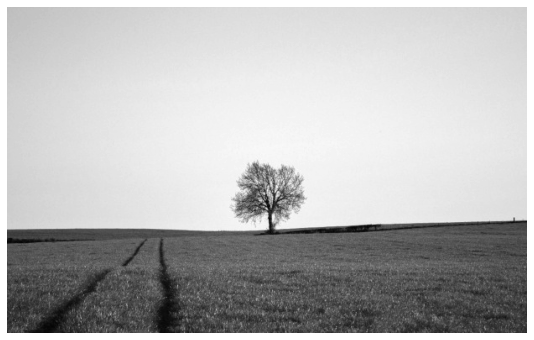

In [62]:
img = cv.imread('paisagem01.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
funcoes.mostrar(gray, cmap_='gray')

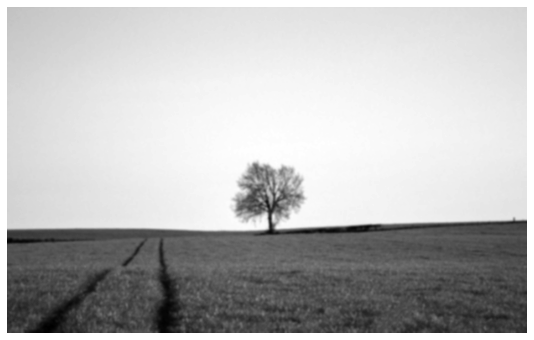

In [63]:
desfoque = cv.GaussianBlur(gray, (5,5), 0)
mostrar(desfoque)

Sobel

In [64]:
#Primeira maneira
k_sobelX = np.array(([-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]), np.float32)
k_sobelY = np.array(([-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]), np.float32)

sobel_x = cv.filter2D(desfoque, cv.CV_64F, k_sobelX)
sobel_y = cv.filter2D(desfoque, cv.CV_64F, k_sobelY)

In [65]:
#Segunda maneira
sobel_x = cv.Sobel(desfoque, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(desfoque, cv.CV_64F, 0, 1, ksize=3)

Converte os valores da imagem para números absolutos

In [66]:
sobel_x = cv.convertScaleAbs(sobel_x)
sobel_y = cv.convertScaleAbs(sobel_y) 

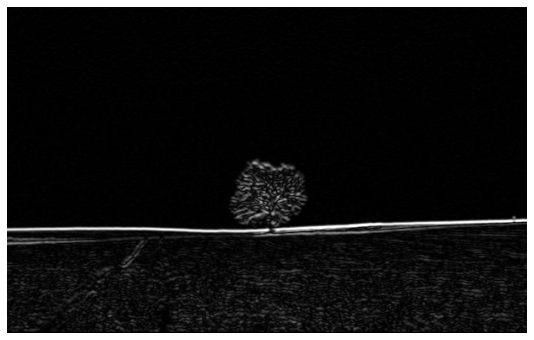

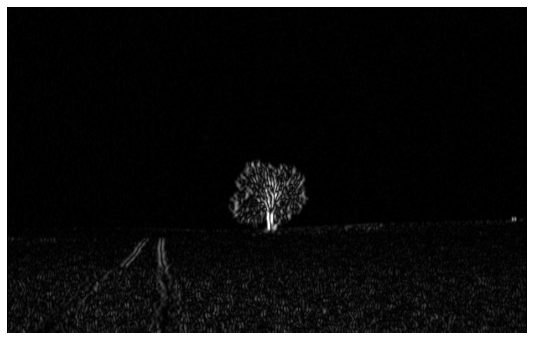

In [67]:
mostrar(sobel_y)
mostrar(sobel_x)

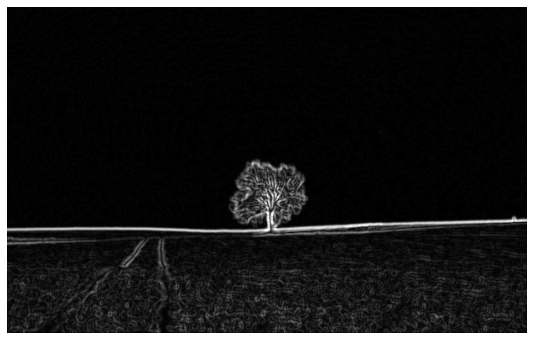

In [68]:
sobel = cv.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y, beta=0.5, gamma=100)
mostrar(sobel)


Canny Edge

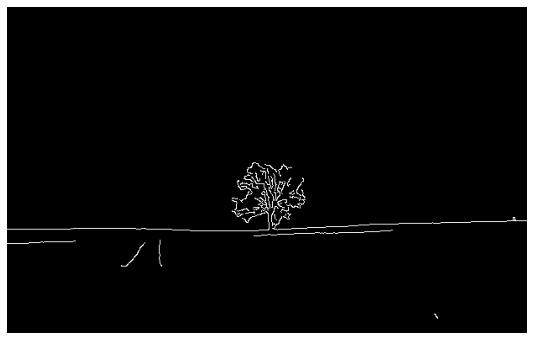

In [69]:
canny = cv.Canny(desfoque, 80, 140)
mostrar(canny)

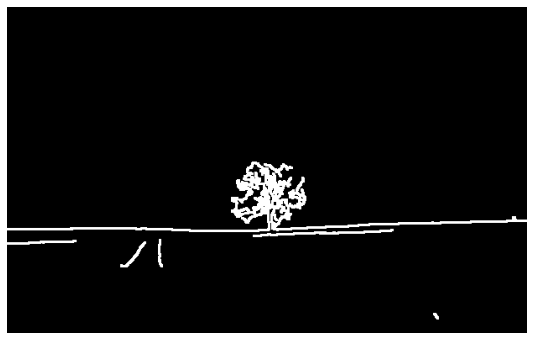

In [70]:
dilatacao = cv.dilate(canny, np.ones((3,3), np.uint8))
mostrar(dilatacao)

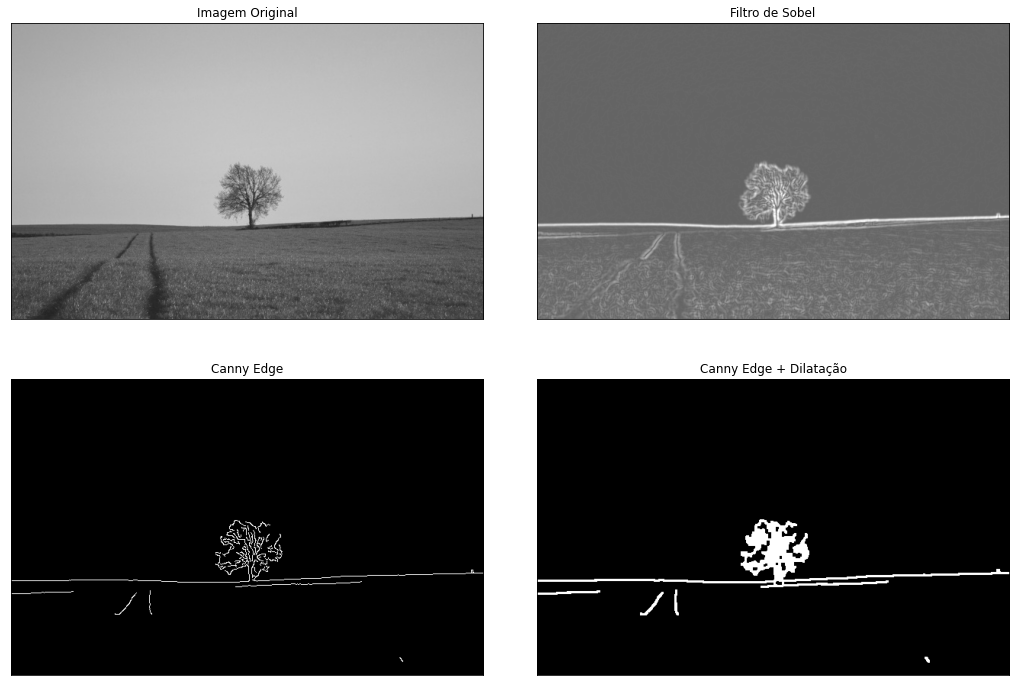

In [73]:

segmentacao_bordas(gray)


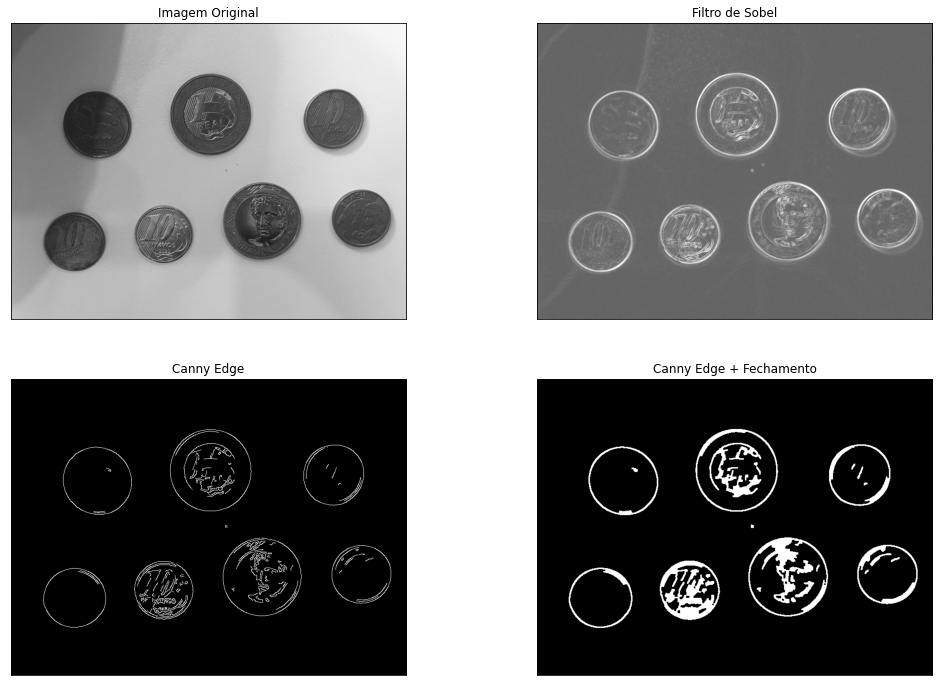

In [75]:
img = cv.imread('moedas02.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
segmentacao_bordas(gray)

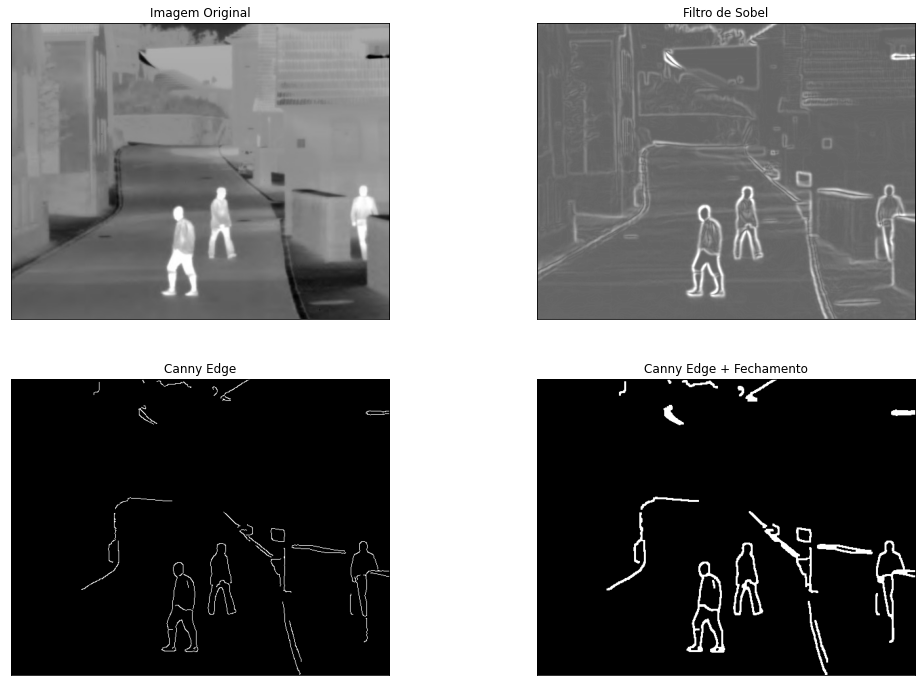

In [76]:
img = cv.imread('thermal01.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
segmentacao_bordas(gray)

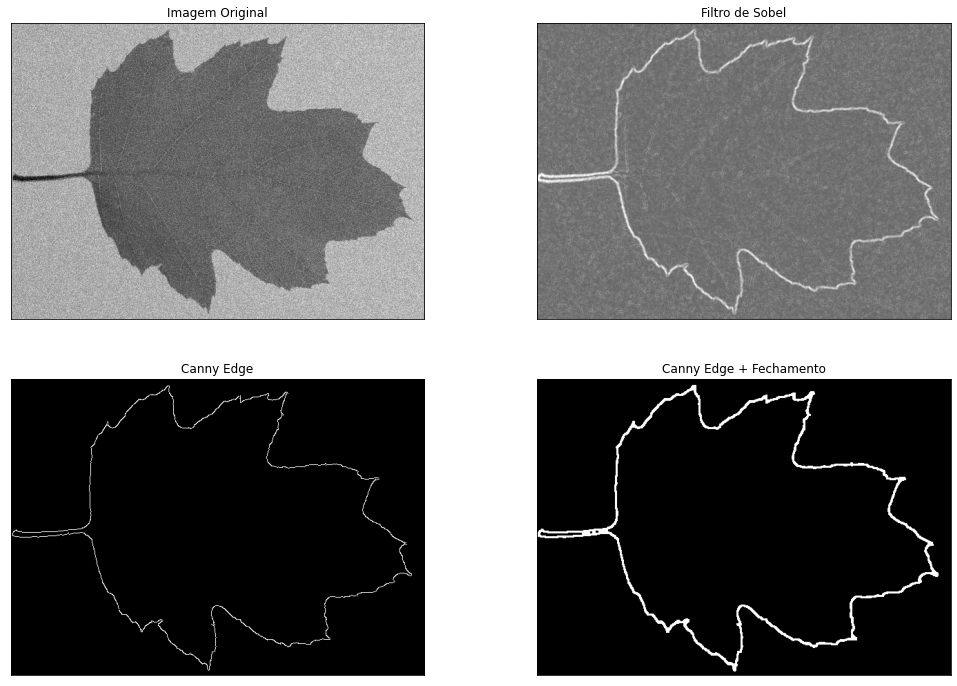

In [77]:
img = cv.imread('folha_ruido.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
segmentacao_bordas(gray)

Preenchimento das detecções

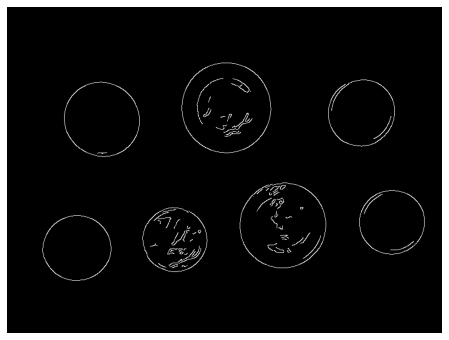

In [79]:
img = cv.imread('moedas02.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
desfoque = cv.GaussianBlur(gray, (7,7), 0)
canny = cv.Canny(desfoque, 80, 140)
mostrar(canny)


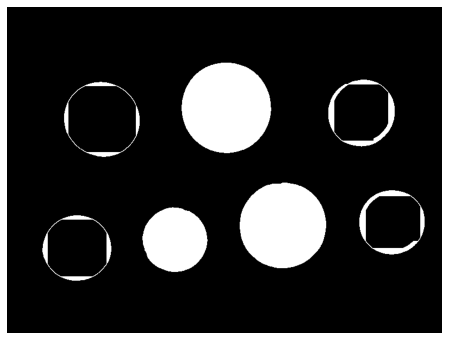

In [84]:
closing = cv.morphologyEx(canny, cv.MORPH_CLOSE, np.ones((5,5), np.uint8), iterations=14 )
mostrar(closing)

Detecção de contornos

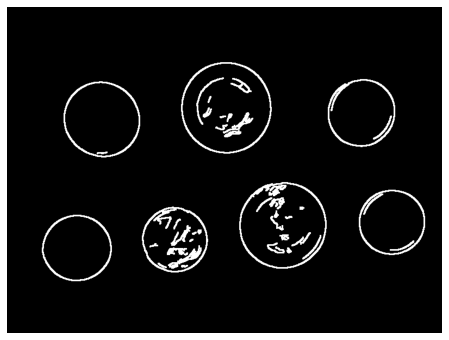

In [85]:
dilatacao = cv.dilate(canny, np.ones((3,3), np.uint8), iterations=1)
mostrar(dilatacao)

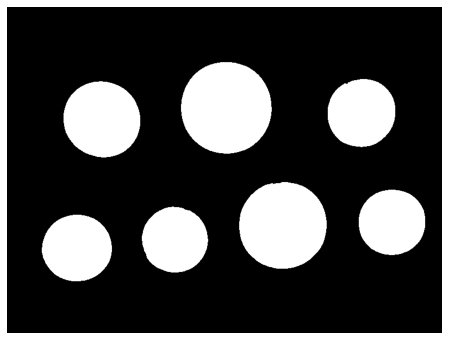

In [94]:
contornos, hierarquia = cv.findContours(dilatacao, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
mascara = np.zeros((img.shape[0], img.shape[1]), np.uint8)
cv.drawContours(mascara, contornos, -1, color=(255,255,255), thickness=cv.FILLED)
mostrar(mascara)

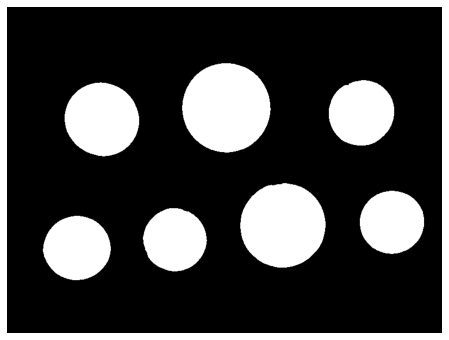

In [95]:
mascara = cv.erode(mascara, np.ones((3,3), np.uint8), iterations=2)
mostrar(mascara)


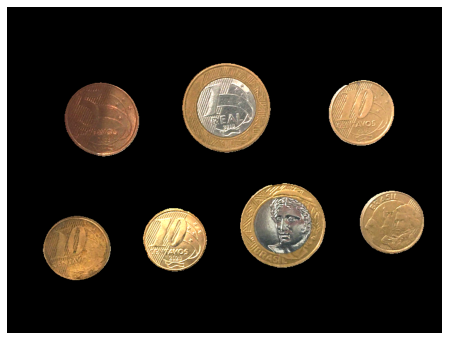

In [97]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_final = cv.add(img, img, mask=mascara)
mostrar(img_final)